# Exercise W2 L3

In [9]:
# imports
import numpy as np
from scipy.ndimage import uniform_filter1d
from matplotlib import pyplot as plt
import pandas

from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.api as sm

# Load the Data

In [7]:
sst = pandas.read_table('../Data/GMST_1880_2020_NASA.txt', delim_whitespace=True,skiprows=5,
                       names=['year', 'SST', 'eSST'])

In [8]:
sst.head()

,year,SST,eSST
0,1880,-0.15,-0.08
1,1881,-0.07,-0.12
2,1882,-0.10,-0.16
3,1883,-0.17,-0.20
4,1884,-0.28,-0.23


# Fit a trend

## https://datatofish.com/statsmodels-linear-regression/ 

## Setup

In [16]:
x = sst.year.values
X = sm.add_constant(x)
Y = sst.SST.values

## Fit ignoring uncertainty first

In [17]:
model = sm.OLS(Y, X).fit()

## Predictions

In [18]:
predictions = model.predict(X) 

## Summary

In [19]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.756
Model:                            OLS   Adj. R-squared:                  0.754
Method:                 Least Squares   F-statistic:                     434.1
Date:                Mon, 04 Apr 2022   Prob (F-statistic):           9.77e-45
Time:                        17:06:10   Log-Likelihood:                 42.987
No. Observations:                 142   AIC:                            -81.97
Df Residuals:                     140   BIC:                            -76.06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -14.9231      0.719    -20.753      0.000     -16.345     -13.501
x1             0.0077      0.000     20.834      0.000       0.007       0.008
==============================================================================
Omnibus:                        4.957   Durbin-Watson:                   0.383
Prob(Omnibus):                  0.084   Jarque-Bera (JB):                4.736
Skew:                           0.392   Prob(JB):                       0.0937
Kurtosis:                       2.570   Cond. No.                     9.29e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.29e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Plot

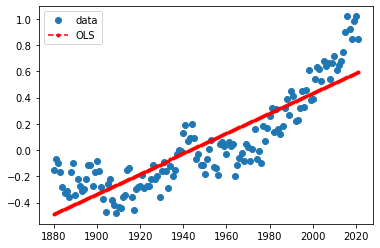

In [22]:
plt.clf()
ax = plt.gca()
ax.plot(x, Y, "o", label="data")
#ax.plot(x, y_true, "b-", label="True")
ax.plot(x, model.fittedvalues, "r--.", label="OLS")
#ax.plot(x, iv_u, "r--")
#ax.plot(x, iv_l, "r--")
ax.legend(loc="best")
plt.show()